In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [4]:
death_data = pd.read_csv("../clean_data/ma_town_opioid_overdose_death_by_place_of_death_2014_to_2018.csv")
town_block_match = pd.read_csv("../clean_data/census_block_town_match.csv")

In [5]:
acs = pd.read_csv("../raw_data/R12288202_SL150.csv")

In [6]:
death_data.head()

,city_death,2014,2015,2016,2017,2018
0,abington,0,6,1,3,5
1,acton,1,2,3,0,1
2,acushnet,0,4,2,4,0
3,adams,2,3,1,0,4
4,agawam,1,2,0,4,8


In [11]:
town_block_match.drop('Unnamed: 0', axis=1, inplace=True)

In [12]:
town_block_match.head()

,TOWN,POP2010,SHAPE_Area,GEOID10,SHAPE_AREA,POP100_RE
0,wellesley,27982,2.726958e+07,2.502140e+11,6.424854e+05,935.0
1,wellesley,27982,2.726958e+07,2.502140e+11,1.167837e+06,989.0
2,wellesley,27982,2.726958e+07,2.502140e+11,1.182595e+06,968.0
3,wellesley,27982,2.726958e+07,2.502140e+11,1.079832e+06,1145.0
4,wellesley,27982,2.726958e+07,2.502140e+11,5.306549e+05,664.0


In [16]:
print(set(death_data['city_death']) - set(town_block_match['TOWN']))
print(set(town_block_match['TOWN']) -set(death_data['city_death']))

{'north attleboro'}
{'north attleborough'}


In [18]:
death_data['city_death'] = death_data['city_death'].str.replace('north attleboro', 'north attleborough')

In [20]:
town_block_match.columns

Index(['TOWN', 'POP2010', 'SHAPE_Area', 'GEOID10', 'SHAPE_AREA', 'POP100_RE'], dtype='object')

In [22]:
town_block = town_block_match[['TOWN', 'GEOID10']].copy()

In [23]:
acs.columns

Index(['Geo_FIPS', 'Geo_GEOID', 'Geo_NAME', 'Geo_QName', 'Geo_STUSAB',
       'Geo_SUMLEV', 'Geo_GEOCOMP', 'Geo_FILEID', 'Geo_LOGRECNO', 'Geo_US',
       ...
       'SE_A10065_001', 'SE_A10065_002', 'SE_A10066_001', 'SE_A10066_002',
       'SE_A10066_003', 'SE_A10066_004', 'SE_A10066_005', 'SE_A10066_006',
       'SE_A10066_007', 'SE_A10066_008'],
      dtype='object', length=2200)

In [24]:
acs[['Geo_FIPS', 'Geo_GEOID']].head()

,Geo_FIPS,Geo_GEOID
0,250010101001,15000US250010101001
1,250010101002,15000US250010101002
2,250010101003,15000US250010101003
3,250010101004,15000US250010101004
4,250010101005,15000US250010101005


In [27]:
print(len(set(acs['Geo_FIPS']) - set(town_block['GEOID10'])))
print(len(set(town_block['GEOID10']) - set(acs['Geo_FIPS'])))

31
4


A00002_001:   Total Population
A00002_002:   Population Density (Per Sq. Mile)
A12003_001:   Civilian Population 16 to 19 Years:
A12003_002:      Not High School Graduate, Not Enrolled (Dropped Out)
     A12003_003:      High School Graduate, or Enrolled (In School)
A12002_001:   Population 25 Years and Over:
A12002_002:      Less than High School
A14006_001:   Median Household Income (In 2017 Inflation Adjusted Dollars)
A14008_001:   Average Household Income 
A14028_001:   Gini Index
NA - A17004_001:     Total Employed Civilian Population 16 Years and Over
NA - A17004_002:     Employed Civilian Population 16 Years and Over: Agriculture, Forestry, Fishing and Hunting, and Mining
NA - A17004_003:     Employed Civilian Population 16 Years and Over: Construction

In [41]:
acs_sub = acs[['Geo_FIPS', 'SE_A00002_001', 'SE_A00002_002',
     'SE_A12003_001', 'SE_A12003_002',
    'SE_A12002_001', 'SE_A12002_002', 'SE_A14006_001',
     'SE_A14008_001', 'SE_A14028_001']].copy()

In [42]:
acs_sub.columns

Index(['Geo_FIPS', 'SE_A00002_001', 'SE_A00002_002', 'SE_A12003_001',
       'SE_A12003_002', 'SE_A12002_001', 'SE_A12002_002', 'SE_A14006_001',
       'SE_A14008_001', 'SE_A14028_001'],
      dtype='object')

In [44]:
acs_sub.columns = ['GEOID10', 'tot_pop', 'pop_density',
 'civ_pop_16_19', 'civ_pop_16_19_drop',
 'pop_over_25', 'pop_over_25_less_school', 'med_house_inc',
'mean_house_inc', 'gini_inc_inequal']

In [45]:
acs_sub.head()

,GEOID10,tot_pop,pop_density,civ_pop_16_19,civ_pop_16_19_drop,pop_over_25,pop_over_25_less_school,med_house_inc,mean_house_inc,gini_inc_inequal
0,250010101001,998,116.1545,8,0,894,46,52340.0,75538.664323,NaN
1,250010101002,314,613.6218,0,0,292,8,37841.0,65213.419913,NaN
2,250010101003,750,3997.7830,12,0,638,28,58098.0,84414.854111,NaN
3,250010101004,500,2019.0900,2,0,437,23,30396.0,46373.442623,NaN
4,250010101005,390,2952.7180,0,0,377,28,47895.0,66060.344828,NaN


In [48]:
acs_sub.drop('gini_inc_inequal', axis=1, inplace=True)

In [49]:
acs_sub.head()

,GEOID10,tot_pop,pop_density,civ_pop_16_19,civ_pop_16_19_drop,pop_over_25,pop_over_25_less_school,med_house_inc,mean_house_inc
0,250010101001,998,116.1545,8,0,894,46,52340.0,75538.664323
1,250010101002,314,613.6218,0,0,292,8,37841.0,65213.419913
2,250010101003,750,3997.7830,12,0,638,28,58098.0,84414.854111
3,250010101004,500,2019.0900,2,0,437,23,30396.0,46373.442623
4,250010101005,390,2952.7180,0,0,377,28,47895.0,66060.344828


In [52]:
acs_sub['drop_out'] = (acs_sub['civ_pop_16_19_drop'] * 100) / acs_sub['civ_pop_16_19']

In [56]:
acs_sub.drop(['civ_pop_16_19_drop', 'civ_pop_16_19'], axis = 1, inplace=True)

In [57]:
acs_sub.head()

,GEOID10,tot_pop,pop_density,pop_over_25,pop_over_25_less_school,med_house_inc,mean_house_inc,drop_out
0,250010101001,998,116.1545,894,46,52340.0,75538.664323,0.0
1,250010101002,314,613.6218,292,8,37841.0,65213.419913,NaN
2,250010101003,750,3997.7830,638,28,58098.0,84414.854111,0.0
3,250010101004,500,2019.0900,437,23,30396.0,46373.442623,0.0
4,250010101005,390,2952.7180,377,28,47895.0,66060.344828,NaN


In [58]:
acs_sub['less_than_hs_ed'] = (acs_sub['pop_over_25_less_school'] * 100) / acs_sub['pop_over_25']

In [59]:
acs_sub.head()

,GEOID10,tot_pop,pop_density,pop_over_25,pop_over_25_less_school,med_house_inc,mean_house_inc,drop_out,less_than_hs_ed
0,250010101001,998,116.1545,894,46,52340.0,75538.664323,0.0,5.145414
1,250010101002,314,613.6218,292,8,37841.0,65213.419913,NaN,2.739726
2,250010101003,750,3997.7830,638,28,58098.0,84414.854111,0.0,4.388715
3,250010101004,500,2019.0900,437,23,30396.0,46373.442623,0.0,5.263158
4,250010101005,390,2952.7180,377,28,47895.0,66060.344828,NaN,7.427056


In [62]:
acs_sub.drop(['pop_over_25', 'pop_over_25_less_school'], axis = 1, inplace=True)

In [63]:
acs_sub.head()

,GEOID10,tot_pop,pop_density,med_house_inc,mean_house_inc,drop_out,less_than_hs_ed
0,250010101001,998,116.1545,52340.0,75538.664323,0.0,5.145414
1,250010101002,314,613.6218,37841.0,65213.419913,NaN,2.739726
2,250010101003,750,3997.7830,58098.0,84414.854111,0.0,4.388715
3,250010101004,500,2019.0900,30396.0,46373.442623,0.0,5.263158
4,250010101005,390,2952.7180,47895.0,66060.344828,NaN,7.427056


In [64]:
acs_sub['mean_med_inc_desp'] = acs_sub['mean_house_inc'] - acs_sub['med_house_inc']

In [65]:
acs_sub.head()

,GEOID10,tot_pop,pop_density,med_house_inc,mean_house_inc,drop_out,less_than_hs_ed,mean_med_inc_desp
0,250010101001,998,116.1545,52340.0,75538.664323,0.0,5.145414,23198.664323
1,250010101002,314,613.6218,37841.0,65213.419913,NaN,2.739726,27372.419913
2,250010101003,750,3997.7830,58098.0,84414.854111,0.0,4.388715,26316.854111
3,250010101004,500,2019.0900,30396.0,46373.442623,0.0,5.263158,15977.442623
4,250010101005,390,2952.7180,47895.0,66060.344828,NaN,7.427056,18165.344828


In [66]:
acs_sub.describe()

,GEOID10,tot_pop,pop_density,med_house_inc,mean_house_inc,drop_out,less_than_hs_ed,mean_med_inc_desp
count,4.985000e+03,4985.000000,4978.000000,4754.000000,4945.000000,4522.000000,4966.000000,4754.000000
mean,2.501713e+11,1361.949649,8442.368002,82522.340766,101843.077887,3.243938,10.322376,20133.424207
std,7.723758e+07,670.479216,12666.048861,40805.023166,52403.666245,11.600150,10.883416,23260.818374
min,2.500101e+11,0.000000,0.000000,2499.000000,14219.285714,0.000000,0.000000,-28320.588235
25%,2.500927e+11,880.000000,1082.917000,53333.000000,66678.928571,0.000000,2.733292,7708.925394
50%,2.501735e+11,1220.000000,3632.338000,77321.000000,92363.461538,0.000000,6.583277,14932.428493
75%,2.502354e+11,1696.000000,10744.957500,104048.250000,123559.710145,0.000000,14.309627,25253.478921
max,2.502776e+11,6760.000000,183026.000000,250001.000000,526877.386935,100.000000,100.000000,276876.386935


In [68]:
acs_sub.drop('drop_out', axis=1, inplace=True)

C:\Users\Dasha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Dasha\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


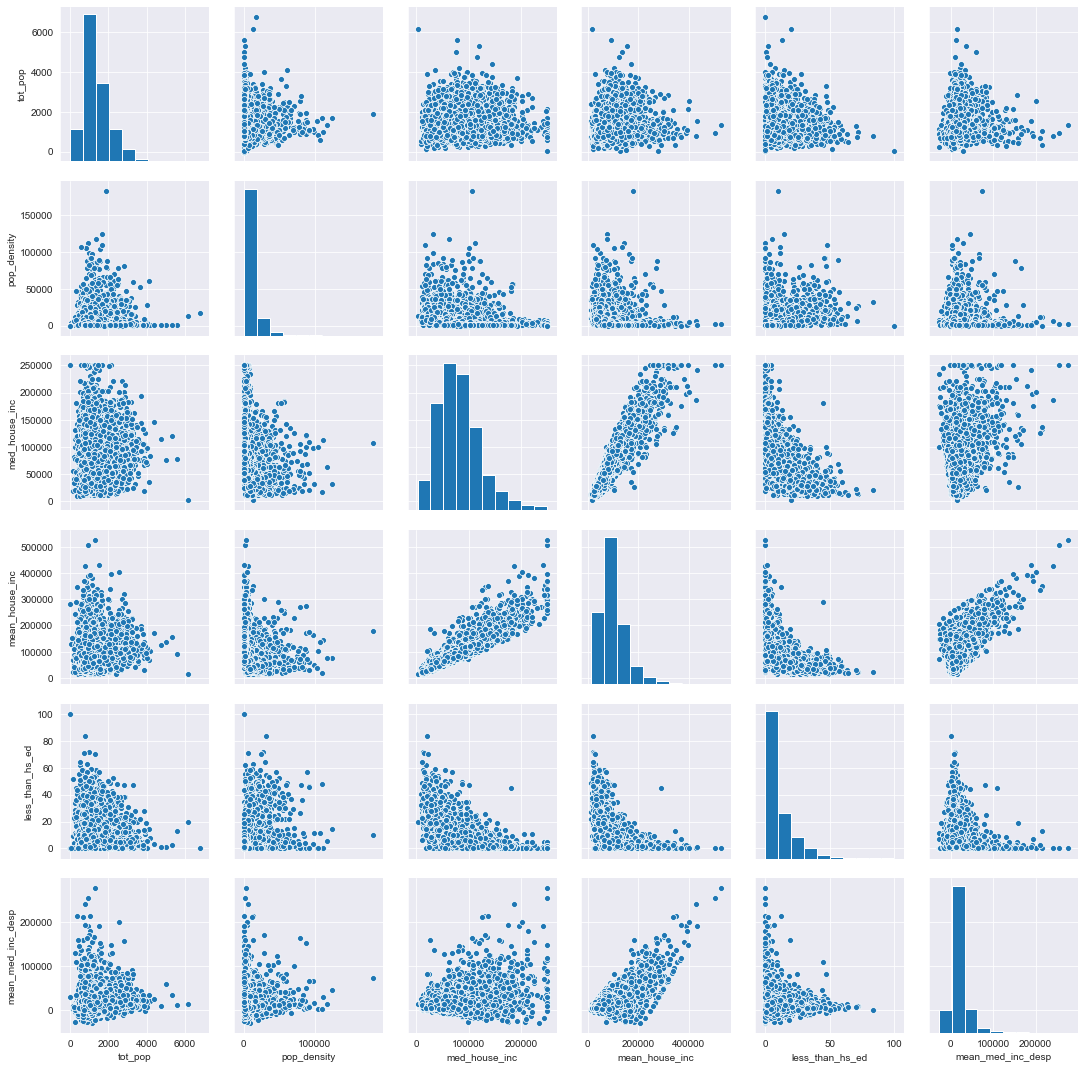

In [71]:
sns.pairplot(acs_sub.iloc[:, 1:])

In [72]:
acs_sub.head()

,GEOID10,tot_pop,pop_density,med_house_inc,mean_house_inc,less_than_hs_ed,mean_med_inc_desp
0,250010101001,998,116.1545,52340.0,75538.664323,5.145414,23198.664323
1,250010101002,314,613.6218,37841.0,65213.419913,2.739726,27372.419913
2,250010101003,750,3997.7830,58098.0,84414.854111,4.388715,26316.854111
3,250010101004,500,2019.0900,30396.0,46373.442623,5.263158,15977.442623
4,250010101005,390,2952.7180,47895.0,66060.344828,7.427056,18165.344828


In [73]:
town_block.head()

,TOWN,GEOID10
0,wellesley,2.502140e+11
1,wellesley,2.502140e+11
2,wellesley,2.502140e+11
3,wellesley,2.502140e+11
4,wellesley,2.502140e+11


In [76]:
town_block.columns = ['city_death', 'GEOID10']

In [77]:
town_block.head()

,city_death,GEOID10
0,wellesley,2.502140e+11
1,wellesley,2.502140e+11
2,wellesley,2.502140e+11
3,wellesley,2.502140e+11
4,wellesley,2.502140e+11


In [79]:
town_block.shape

(4958, 2)

In [74]:
death_data.head()

,city_death,2014,2015,2016,2017,2018
0,abington,0,6,1,3,5
1,acton,1,2,3,0,1
2,acushnet,0,4,2,4,0
3,adams,2,3,1,0,4
4,agawam,1,2,0,4,8


In [81]:
town_acs_merge = town_block.merge(acs_sub, on='GEOID10', how='inner')

In [82]:
town_acs_merge.columns

Index(['city_death', 'GEOID10', 'tot_pop', 'pop_density', 'med_house_inc',
       'mean_house_inc', 'less_than_hs_ed', 'mean_med_inc_desp'],
      dtype='object')

In [83]:
town_acs_merge.head()

,city_death,GEOID10,tot_pop,pop_density,med_house_inc,mean_house_inc,less_than_hs_ed,mean_med_inc_desp
0,wellesley,2.502140e+11,1101,4438.051,183879.0,214803.395062,0.000000,30924.395062
1,wellesley,2.502140e+11,924,2064.697,250001.0,505804.304636,0.000000,255803.304636
2,wellesley,2.502140e+11,881,1947.536,181786.0,244652.447552,1.992754,62866.447552
3,wellesley,2.502140e+11,1177,2961.899,129071.0,240321.641791,4.379562,111250.641791
4,wellesley,2.502140e+11,767,3843.039,86827.0,145115.151515,3.728814,58288.151515


In [86]:
town_pop = town_acs_merge.groupby('city_death').sum().reset_index()[['city_death', 'tot_pop']]

In [87]:
town_pop.head()

,city_death,tot_pop
0,abington,16275
1,acton,23455
2,acushnet,10443
3,adams,8211
4,agawam,27769


In [91]:
town_stats = town_acs_merge.groupby('city_death').mean().reset_index().drop(['GEOID10', 'tot_pop'], axis=1)

In [94]:
full_merge = town_pop.merge(town_stats, on='city_death', how='inner').merge(death_data, on='city_death', how='inner')

In [95]:
full_merge.head()

,city_death,tot_pop,pop_density,med_house_inc,mean_house_inc,less_than_hs_ed,mean_med_inc_desp,2014,2015,2016,2017,2018
0,abington,16275,1932.969130,87156.000000,98809.035505,5.334519,11653.035505,0,6,1,3,5
1,acton,23455,1257.583593,139890.466667,156680.203867,2.778635,16789.737200,1,2,3,0,1
2,acushnet,10443,1152.357871,69624.714286,80333.175842,17.217211,10708.461556,0,4,2,4,0
3,adams,8211,1982.318840,48445.400000,60968.594660,12.015167,12523.194660,2,3,1,0,4
4,agawam,27769,1897.273569,65490.125000,79464.234446,7.943053,13974.109446,1,2,0,4,8


In [98]:
full_merge['Y14_Y15'] = (((full_merge['2015'] - full_merge['2014']) / full_merge['2014']) * 100).replace(np.inf, np.nan)

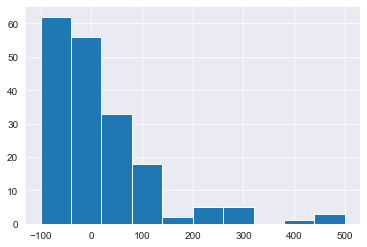

In [99]:
full_merge['Y14_Y15'].hist()

In [105]:
pop_melt = full_merge[['city_death', 'tot_pop', '2014', '2015', '2016', '2017', '2018']].melt(id_vars=['city_death', 'tot_pop'], value_vars=['2014', '2015', '2016', '2017', '2018'])

In [106]:
pop_melt.head()

,city_death,tot_pop,variable,value
0,abington,16275,2014,0
1,acton,23455,2014,1
2,acushnet,10443,2014,0
3,adams,8211,2014,2
4,agawam,27769,2014,1


In [109]:
pop_melt['death_per_10k'] = pop_melt['value'] / (pop_melt['tot_pop'] / 10000)

In [110]:
pop_melt.head()

,city_death,tot_pop,variable,value,death_per_10k
0,abington,16275,2014,0,0.000000
1,acton,23455,2014,1,0.426348
2,acushnet,10443,2014,0,0.000000
3,adams,8211,2014,2,2.435757
4,agawam,27769,2014,1,0.360114


In [135]:
from math import sqrt

In [137]:
pop_prop = full_merge[['city_death', 'tot_pop', '2014', '2015', '2016', '2017', '2018']].copy()
pop_prop['2014'] = pop_prop['2014'] / (pop_prop['tot_pop'] / 10000)
pop_prop['2015'] = pop_prop['2015'] / (pop_prop['tot_pop'] / 10000)
pop_prop['2016'] = pop_prop['2016'] / (pop_prop['tot_pop'] / 10000)
pop_prop['2017'] = pop_prop['2017'] / (pop_prop['tot_pop'] / 10000)
pop_prop['2018'] = pop_prop['2018'] / (pop_prop['tot_pop'] / 10000)

In [153]:
pop_prop.head()

,city_death,tot_pop,2014,2015,2016,2017,2018
0,abington,16275,0.000000,3.686636,0.614439,1.843318,3.072197
1,acton,23455,0.426348,0.852697,1.279045,0.000000,0.426348
2,acushnet,10443,0.000000,3.830317,1.915158,3.830317,0.000000
3,adams,8211,2.435757,3.653635,1.217878,0.000000,4.871514
4,agawam,27769,0.360114,0.720228,0.000000,1.440455,2.880910


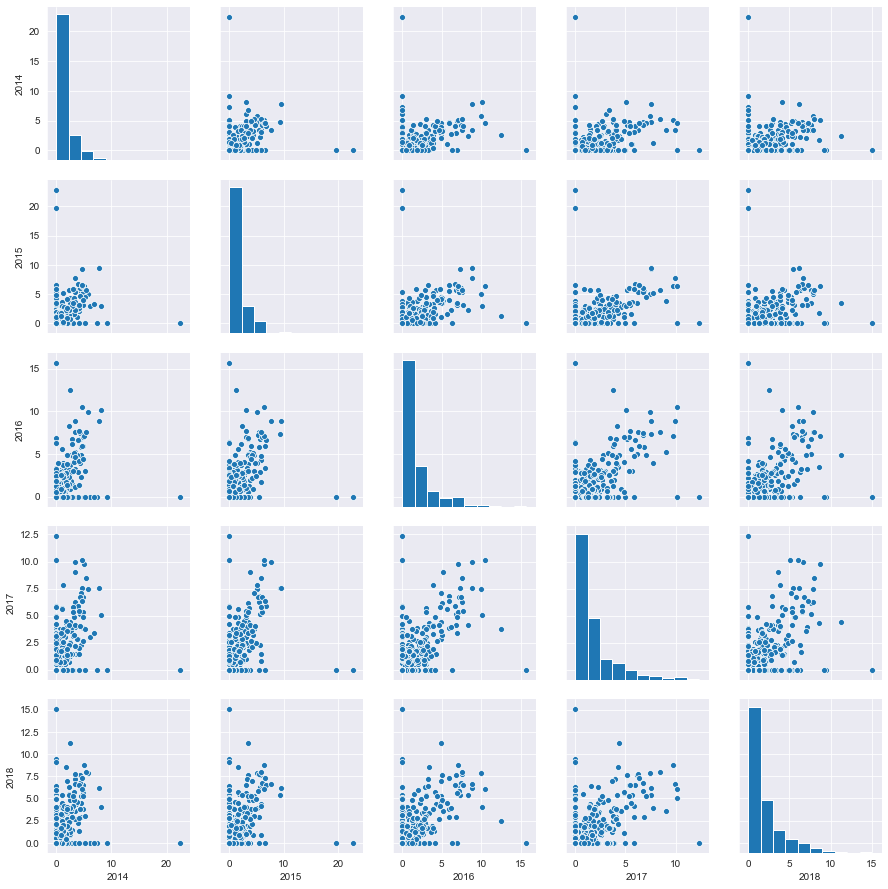

In [155]:
sns.pairplot(pop_prop[['2014', '2015', '2016', '2017', '2018']])


In [149]:
test = pop_prop.iloc[:,2:].copy().apply(np.sqrt, axis=1)

In [116]:
pop_prop.head()

,city_death,tot_pop,2014,2015,2016,2017,2018
0,abington,16275,0.000000,3.686636,0.614439,1.843318,3.072197
1,acton,23455,0.426348,0.852697,1.279045,0.000000,0.426348
2,acushnet,10443,0.000000,3.830317,1.915158,3.830317,0.000000
3,adams,8211,2.435757,3.653635,1.217878,0.000000,4.871514
4,agawam,27769,0.360114,0.720228,0.000000,1.440455,2.880910


In [119]:
colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]

In [ ]:
sns.set(rc={'figure.figsize':(16,10)})

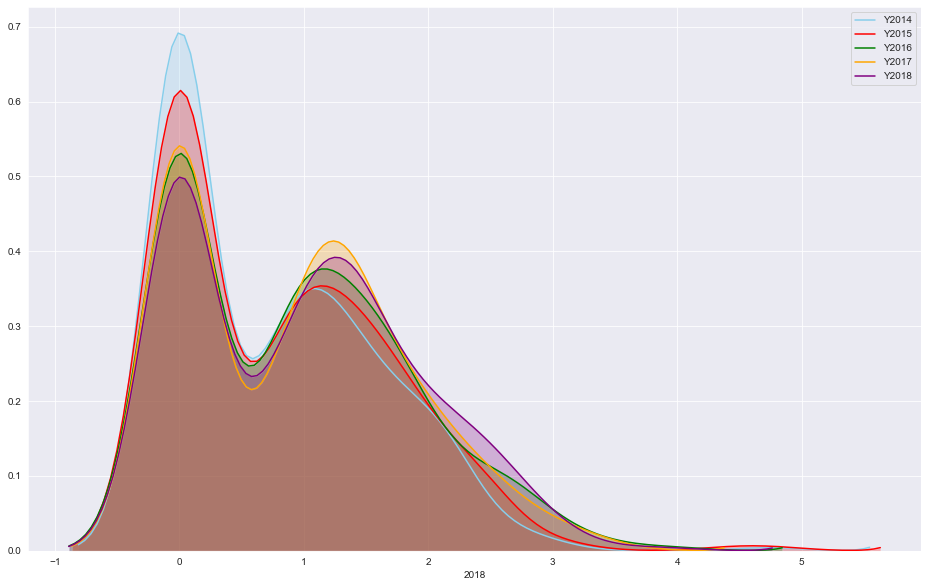

In [152]:
plt.figure(figsize=(16,10))
sns.distplot(test["2014"], color="skyblue", label="Y2014", hist=False, kde_kws={"shade": True})
sns.distplot(test["2015"], color="red", label="Y2015", hist=False, kde_kws={"shade": True})
sns.distplot(test["2016"], color="green", label="Y2016", hist=False, kde_kws={"shade": True})
sns.distplot(test["2017"], color="orange", label="Y2017", hist=False, kde_kws={"shade": True})
sns.distplot(test["2018"], color="purple", label="Y2018", hist=False, kde_kws={"shade": True})
plt.legend()
plt.show()

In [156]:
pop_prop.head()

,city_death,tot_pop,2014,2015,2016,2017,2018
0,abington,16275,0.000000,3.686636,0.614439,1.843318,3.072197
1,acton,23455,0.426348,0.852697,1.279045,0.000000,0.426348
2,acushnet,10443,0.000000,3.830317,1.915158,3.830317,0.000000
3,adams,8211,2.435757,3.653635,1.217878,0.000000,4.871514
4,agawam,27769,0.360114,0.720228,0.000000,1.440455,2.880910


In [157]:
full_merge.head()

,city_death,tot_pop,pop_density,med_house_inc,mean_house_inc,less_than_hs_ed,mean_med_inc_desp,2014,2015,2016,2017,2018,Y14_Y15
0,abington,16275,1932.969130,87156.000000,98809.035505,5.334519,11653.035505,0,6,1,3,5,NaN
1,acton,23455,1257.583593,139890.466667,156680.203867,2.778635,16789.737200,1,2,3,0,1,100.0
2,acushnet,10443,1152.357871,69624.714286,80333.175842,17.217211,10708.461556,0,4,2,4,0,NaN
3,adams,8211,1982.318840,48445.400000,60968.594660,12.015167,12523.194660,2,3,1,0,4,50.0
4,agawam,27769,1897.273569,65490.125000,79464.234446,7.943053,13974.109446,1,2,0,4,8,100.0


In [158]:
#full_merge.to_csv("../clean_data/city_death_w_acs_merge.csv")

In [164]:
pop_prop.sort_values('2018', ascending=False).head(10)

,city_death,tot_pop,2014,2015,2016,2017,2018
293,tolland,666,0.000000,0.000000,0.000000,0.000000,15.015015
101,gardner,20496,2.439500,3.415301,4.879001,4.391101,11.221702
57,cheshire,3169,0.000000,0.000000,0.000000,0.000000,9.466709
322,west stockbridge,1095,0.000000,0.000000,0.000000,0.000000,9.132420
254,salem,41115,5.107625,6.323726,7.053387,9.728809,8.755928
15,athol,11680,1.712329,1.712329,3.424658,4.280822,8.561644
306,wareham,22535,5.325050,5.768804,7.543821,8.431329,7.987575
93,fall river,85548,5.727779,5.026418,9.935942,7.481180,7.831860
146,lawrence,79497,3.396355,5.409009,7.547455,6.289546,7.799036
20,barnstable,44325,4.286520,5.640158,6.768190,5.188945,7.670615


In [165]:
pop_prop.sort_values('2017', ascending=False).head(10)

,city_death,tot_pop,2014,2015,2016,2017,2018
229,peru,811,0.000000,0.000000,0.000000,12.330456,0.000000
279,stockbridge,1980,0.000000,0.000000,0.000000,10.101010,5.050505
332,weymouth,54469,4.589767,6.425673,10.464668,10.097487,6.058492
255,salisbury,9021,3.325574,7.759672,8.868196,9.976721,6.651147
254,salem,41115,5.107625,6.323726,7.053387,9.728809,8.755928
16,attleboro,44326,3.384018,3.835221,5.188828,9.024049,3.609620
306,wareham,22535,5.325050,5.768804,7.543821,8.431329,7.987575
139,hull,7702,1.298364,5.193456,3.895092,7.790184,3.895092
91,everett,45212,7.741308,9.510749,8.847209,7.520127,6.193046
44,brockton,94602,4.756770,9.302129,7.293715,7.505127,5.391007
